In [341]:
#Importing the necessary libraries to carry out our analysis
import pandas as pd
import numpy as np
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

# Style and size of graph

sb.set_style('darkgrid')
sb.set(rc={'figure.figsize':(9,7)})

In [342]:
df = pd.read_csv('prosperLoanData.csv')

In [343]:
print(df.shape)
df.head(3)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


The Prosper Loan dataset has a lot of variables and dimensions present in the columns (81), as well as 113,937 observations.


### Variable	Description
- ListingKey: Unique key for each listing, same value as the 'key' used in the listing object in the API.
- ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website.
- ListingCreationDate: The date the listing was created.
- CreditGrade: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
- Term: The length of the loan expressed in months.
- LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- ClosedDate: Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses. 
- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- BorrowerRate: The Borrower's interest rate for this loan. 
- LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
- EstimatedEffectiveYield: Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.
- EstimatedLoss: Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.
- EstimatedReturn: The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.
- ProsperRating (numeric)	The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
- ProsperRating (Alpha)	The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
- ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
- ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- Occupation: The Occupation selected by the Borrower at the time they created the listing.
- EmploymentStatus: The employment status of the borrower at the time they posted the listing.
- EmploymentStatusDuration: The length in months of the employment status at the time the listing was created.
- IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- CurrentlyInGroup: Specifies whether or not the Borrower was in a group at the time the listing was created.
- GroupKey: The Key of the group in which the Borrower is a member of. Value will be null if the borrower does not have a group affiliation.
- DateCreditPulled: The date the credit profile was pulled. 
- CreditScoreRangeLower: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
- CreditScoreRangeUpper: The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 
- FirstRecordedCreditLine: The date the first credit line was opened.
- CurrentCreditLines: Number of current credit lines at the time the credit profile was pulled.
- OpenCreditLines: Number of open credit lines at the time the credit profile was pulled.
- TotalCreditLinespast7years: Number of credit lines in the past seven years at the time the credit profile was pulled.
- OpenRevolvingAccounts: Number of open revolving accounts at the time the credit profile was pulled.
- OpenRevolvingMonthlyPayment: Monthly payment on revolving accounts at the time the credit profile was pulled.
- InquiriesLast6Months: Number of inquiries in the past six months at the time the credit profile was pulled.
- TotalInquiries: Total number of inquiries at the time the credit profile was pulled.
- CurrentDelinquencies: Number of accounts delinquent at the time the credit profile was pulled.
- AmountDelinquent: Dollars delinquent at the time the credit profile was pulled.
- DelinquenciesLast7Years: Number of delinquencies in the past 7 years at the time the credit profile was pulled.
- PublicRecordsLast10Years: Number of public records in the past 10 years at the time the credit profile was pulled.
- PublicRecordsLast12Months: Number of public records in the past 12 months at the time the credit profile was pulled.
- RevolvingCreditBalance: Dollars of revolving credit at the time the credit profile was pulled.
- BankcardUtilization: The percentage of available revolving credit that is utilized at the time the credit profile was pulled.
- AvailableBankcardCredit: The total available credit via bank card at the time the credit profile was pulled.
- TotalTrades: Number of trade lines ever opened at the time the credit profile was pulled.
- TradesNeverDelinquent: Number of trades that have never been delinquent at the time the credit profile was pulled.
- TradesOpenedLast6Months: Number of trades opened in the last 6 months at the time the credit profile was pulled.
- DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
- IncomeRange: The income range of the borrower at the time the listing was created.
- IncomeVerifiable: The borrower indicated they have the required documentation to support their income.
- StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
- LoanKey: Unique key for each loan. This is the same key that is used in the API. 
- TotalProsperLoans: Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 
- TotalProsperPaymentsBilled: Number of on time payments the borrower made on Prosper loans at the time they created this listing. This value will be null if the borrower had no prior loans.
- OnTimeProsperPayments: Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans.
- ProsperPaymentsLessThanOneMonthLate: Number of payments the borrower made on Prosper loans that were less than one month late at the time they created this listing. This value will be null if the borrower had no prior loans. 
- ProsperPaymentsOneMonthPlusLate: Number of payments the borrower made on Prosper loans that were greater than one month late at the time they created this listing. This value will be null if the borrower had no prior loans.
- ProsperPrincipalBorrowed: Total principal borrowed on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.
- ProsperPrincipalOutstanding: Principal outstanding on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.
- ScorexChangeAtTimeOfListing: Borrower's credit score change at the time the credit profile was pulled. This will be the change relative to the borrower's last Prosper loan. This value will be null if the borrower had no prior loans.
- LoanCurrentDaysDelinquent: The number of days delinquent. 
- LoanFirstDefaultedCycleNumber: The cycle the loan was charged off. If the loan has not charged off the value will be null. 
- LoanMonthsSinceOrigination: Number of months since the loan originated.
- LoanNumber: Unique numeric value associated with the loan.
- LoanOriginalAmount: The origination amount of the loan.
- LoanOriginationDate: The date the loan was originated.
- LoanOriginationQuarter: The quarter in which the loan was originated.
- MemberKey: The unique key that is associated with the borrower. This is the same identifier that is used in the API member object. 
- MonthlyLoanPayment: The scheduled monthly loan payment.
- LP_CustomerPayments: Pre charge-off cumulative gross payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.
- LP_CustomerPrincipalPayments: Pre charge-off cumulative principal payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.
- LP_InterestandFees; Pre charge-off cumulative interest and fees paid by the borrower. If the loan has charged off, this value will exclude any recoveries.
- LP_ServiceFees: Cumulative service fees paid by the investors who have invested in the loan. 
- LP_CollectionFees: Cumulative collection fees paid by the investors who have invested in the loan.
- LP_GrossPrincipalLoss: The gross charged off amount of the loan.
- LP_NetPrincipalLoss: The principal that remains uncollected after any recoveries.
- LP_NonPrincipalRecoverypayments: The interest and fee component of any recovery payments. The current payment policy applies payments in the following order: Fees, interest, principal.
- PercentFunded: Percent the listing was funded.
- Recommendations: Number of recommendations the borrower had at the time the listing was created.
- InvestmentFromFriendsCount: Number of friends that made an investment in the loan.
- InvestmentFromFriendsAmount: Dollar amount of investments that were made by friends.
- Investors: The number of investors that funded the loan.

## Assessment

A few elements will need to be fixed in order to make our analysis possible and more insightful.

First and foremost, I am going to define which variables and dimensions will be kept to carry out the analysis. Since we have a fairly big data frame (81 columns), I want to narrow down its size in order to answer a few questions, such as **what does make one have a more pricey loan than others?**. In order to answer I will use the granularity of the next features:

features = ['ProsperScore', 'ListingCategory (numeric)', 'ListingCategory', 'EmploymentStatus', 'EmploymentStatusDuration',
            'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio',
            'IncomeVerifiable','IncomeRange' ,'LoanOriginalAmount', 'LoanStatus', 'IncomeMean', 'IncomeRange']
            
**Quality:**   

- Changing the ListingCreation format


**Tidy:** 

- Changing the IncomeRange format to be able to split into two Income level, the lower and the upper ones
- Creating an IncomeMeans which will account for the means of the two income range levels. This will allow to use this data as an integer (to plot them and look for a correlation)
- Listing Categories, despite being categorical, are in a numeric format. We will want to change this and switch it to string format with the whole category titles spelt out
- Adding a column of WageIncome per month: High, Medium, Low, it might be handy to have a categorical variable instead of the numeric one

In [344]:
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
76296,F11E3585133615689E8291E,850054,2013-07-24 06:35:44.257000000,NaN,60,Past Due (31-60 days),NaN,0.17522,0.1519,0.1419,...,-81.96,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
113792,E43C3548328183436FD70FD,592262,2012-05-23 15:08:31.490000000,NaN,36,Completed,2013-11-05 00:00:00,0.26681,0.2287,0.2187,...,-95.49,0.00,0.00,0.00,0.0,1.0,0,0,0.0,85
85842,59EB3412511457978B8D49E,277942,2008-02-09 22:47:39.993000000,C,36,Completed,2009-02-17 00:00:00,0.20210,0.1800,0.1700,...,-30.45,0.00,0.00,0.00,0.0,1.0,0,0,0.0,74
59250,81BB35927764507839F90E9,967858,2013-11-01 08:34:26.310000000,NaN,60,Current,NaN,0.18197,0.1585,0.1485,...,-49.85,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
17457,865E3582036096344CEAF2F,810314,2013-06-16 09:24:40.150000000,NaN,36,Current,NaN,0.29537,0.2566,0.2466,...,-83.32,0.00,0.00,0.00,0.0,1.0,0,0,0.0,218
21418,38553559397861292D6CBC5,647751,2012-10-01 09:18:56.497000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,-30.98,0.00,0.00,0.00,0.0,1.0,0,0,0.0,31
100729,A9CA3428883667056CA7235,383814,2008-08-16 16:37:10.617000000,C,36,Chargedoff,2009-04-27 00:00:00,0.28320,0.2600,0.2500,...,-14.84,0.00,5660.68,5660.68,0.0,1.0,0,0,0.0,150
17928,87D0355716442876117AC36,639722,2012-09-15 11:20:56.327000000,NaN,36,Completed,2013-11-26 00:00:00,0.35797,0.3177,0.3077,...,-28.51,0.00,0.00,0.00,0.0,1.0,0,0,0.0,19
112043,F09E347366852034578E22C,444218,2010-01-25 18:41:35.677000000,NaN,36,Chargedoff,2012-08-11 00:00:00,0.35050,0.3100,0.3000,...,-14.03,0.00,482.02,482.02,0.0,1.0,0,0,0.0,49
99710,7ECC3588008206001AAE3D2,876683,2013-08-22 06:04:56.660000000,NaN,60,Current,NaN,0.20081,0.1769,0.1669,...,-9.03,-12.87,0.00,0.00,0.0,1.0,0,0,0.0,20


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Cleaning

In [346]:
print('To carry out our analysis, Prosper Score and APR are going to be among of the most important variables.')
print('Then, we need to ensure that these variables are fully exploitable.')
print('Dropping the null means we still have 84,853 observations to draw conclusions, which is more than enough')
#df.dropna(inplace = True)
df = df[df['ProsperScore'].notnull()]
df = df[~df.BorrowerAPR.isna()]

To carry out our analysis, Prosper Score and APR are going to be among of the most important variables.
Then, we need to ensure that these variables are fully exploitable.
Dropping the null means we still have 84,853 observations to draw conclusions, which is more than enough


In [347]:
df['ProsperScore'].isna().sum()

0

In [348]:
#Let's look at the count for each values to get a good sense of what the data looks like
df.IncomeRange.value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

In [349]:
#Let's split the IncomeRange column into two separate columns, and let's get the mean of both after
#First we need to remove the non-numeric characters (out of the hyphen from which we'll split this)
df['IncomeRange'] = df['IncomeRange'].apply(lambda x: x[1:] if x[0] == '$' else x)
df['IncomeRange'] = df['IncomeRange'].apply(lambda x: x.replace(',','').replace('+','').replace('$',''))

In [350]:
di = {'Not employed':'0-0', 'Not displayed':'0-0', '0':'0-0', '100000':'100000-150000'}
df = df.replace({'IncomeRange': di})

In [351]:
df.IncomeRange.value_counts()

50000-74999      25627
25000-49999      24175
100000-150000    15205
75000-99999      14498
1-24999           4654
0-0                694
Name: IncomeRange, dtype: int64

In [352]:
print('We are spliting the two existing variables within IncomeRange into two columns:')
df[['LowerRange', 'UpperRange']] = df.IncomeRange.str.split('-', expand = True)
df.head(3)

We are spliting the two existing variables within IncomeRange into two columns:


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LowerRange,UpperRange
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,1.0,0,0,0.0,1,50000,74999
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,1.0,0,0,0.0,158,25000,49999
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,1.0,0,0,0.0,20,100000,150000


In [353]:
print('Changing the data type of show, from String to Integer.')
def str_to_int(input):
    return np.int(float(input))

Changing the data type of show, from String to Integer.


In [354]:
print('The values need to be changed from string to integer:')
df['LowerRange'] = df['LowerRange'].apply(str_to_int)
df['UpperRange'] = df['UpperRange'].apply(str_to_int)
print(df[['LowerRange','UpperRange']].info())

The values need to be changed from string to integer:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LowerRange  84853 non-null  int64
 1   UpperRange  84853 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB
None


In [355]:
print('Lets create the IncomeMean variable which will help us calculate correlation between this varible and others:' )
df['IncomeMean'] = df[['LowerRange', 'UpperRange']].mean(axis=1)
df['IncomeMean'] = df['IncomeMean'].apply(str_to_int)
df.head(5)

Lets create the IncomeMean variable which will help us calculate correlation between this varible and others:


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LowerRange,UpperRange,IncomeMean
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,1.0,0,0,0.0,1,50000,74999,62499
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,1.0,0,0,0.0,158,25000,49999,37499
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,1.0,0,0,0.0,20,100000,150000,125000
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,0.0,0.0,1.0,0,0,0.0,1,100000,150000,125000
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,0.0,0.0,1.0,0,0,0.0,1,25000,49999,37499


In [356]:
def truncate_extra(row):
    if len(row.ListingCreationDate)==29:
        return row.ListingCreationDate[:-10]
    else:
        return row.ListingCreationDate

In [357]:
df.ListingCreationDate = df.apply(truncate_extra,axis=1)
df.ListingCreationDate = df.ListingCreationDate.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LowerRange,UpperRange,IncomeMean
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,1.0,0,0,0.0,1,50000,74999,62499
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,1.0,0,0,0.0,158,25000,49999,37499
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,1.0,0,0,0.0,20,100000,150000,125000


In [358]:
def classify(row):
    if row["StatedMonthlyIncome"]<2500:
        return 'Low'
    if row["StatedMonthlyIncome"]<8000:
        return 'Medium'
    else:
        return 'High'

In [359]:
df['WageGroup'] = df.apply(classify, axis=1)
df.sample(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LowerRange,UpperRange,IncomeMean,WageGroup
40378,D263358387232430860FF38,843188,2013-07-18 03:15:26,NaN,36,Current,NaN,0.34045,0.3006,0.2906,...,0.0,1.0,0,0,0.0,6,1,24999,12500,Low
37831,340A3602127458119E2A022,1153930,2014-02-11 09:33:49,NaN,60,Current,NaN,0.24882,0.2235,0.2135,...,0.0,1.0,0,0,0.0,1,25000,49999,37499,Medium
49407,E0DC3599467082497E2BF2E,1151754,2014-01-20 12:44:59,NaN,36,Current,NaN,0.34588,0.3059,0.2959,...,0.0,1.0,0,0,0.0,1,75000,99999,87499,Medium


In [360]:
# Decode ListingCategory (numeric) feature by creating an explanoyory column
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df['ListingCategory'] = df['ListingCategory (numeric)'].map(list_dict)

In [361]:
# Define columns of interest for this analysis
features = ['ProsperScore', 'ListingCategory (numeric)', 'ListingCategory', 'EmploymentStatus', 'EmploymentStatusDuration',
            'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio',
            'IncomeVerifiable','IncomeRange' ,'LoanOriginalAmount', 'LoanStatus', 'IncomeMean', 
            'ProsperRating (Alpha)', 'StatedMonthlyIncome', 'Term', 'BorrowerAPR', 'ListingCreationDate']

In [362]:
# Numberical vs Categorical features
numeric_vars = ['ProsperScore', 'EmploymentStatusDuration', 'CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount', 'IncomeMean', 'StatedMonthlyIncome', 'BorrowerAPR']
categoric_vars = ['LoanStatus', 'ListingCategory','EmploymentStatus', 'IsBorrowerHomeowner', 
                  'IncomeVerifiable', 'IncomeRange','ProsperRating (Alpha)', 'Term', 'ListingCreationDate']

In [363]:
df = df[features]
df.head(2)

,ProsperScore,ListingCategory (numeric),ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,IncomeRange,LoanOriginalAmount,LoanStatus,IncomeMean,ProsperRating (Alpha),StatedMonthlyIncome,Term,BorrowerAPR,ListingCreationDate
1,7.0,2,Home Improvement,Employed,44.0,False,14.0,13,0.18,True,50000-74999,10000,Current,62499,A,6125.0,36,0.12016,2014-02-27 08:28:07
3,9.0,16,Motorcycle,Employed,113.0,True,5.0,7,0.15,True,25000-49999,10000,Current,37499,A,2875.0,36,0.12528,2012-10-22 11:02:35


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ProsperScore               84853 non-null  float64       
 1   ListingCategory (numeric)  84853 non-null  int64         
 2   ListingCategory            84853 non-null  object        
 3   EmploymentStatus           84853 non-null  object        
 4   EmploymentStatusDuration   84834 non-null  float64       
 5   IsBorrowerHomeowner        84853 non-null  bool          
 6   CurrentCreditLines         84853 non-null  float64       
 7   OpenRevolvingAccounts      84853 non-null  int64         
 8   DebtToIncomeRatio          77557 non-null  float64       
 9   IncomeVerifiable           84853 non-null  bool          
 10  IncomeRange                84853 non-null  object        
 11  LoanOriginalAmount         84853 non-null  int64         
 12  Loa

## Exploratory Data Analysis

In [365]:
df.describe()

,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,LoanOriginalAmount,IncomeMean,StatedMonthlyIncome,Term,BorrowerAPR
count,84853.000000,84853.000000,84834.000000,84853.000000,84853.000000,77557.000000,84853.000000,84853.000000,8.485300e+04,84853.000000,84853.000000
mean,5.950067,3.312647,103.055320,10.508032,7.386292,0.258752,9083.440515,67594.082708,5.931175e+03,42.486135,0.226658
std,2.376501,4.364277,97.078884,5.317401,4.515977,0.318326,6287.860058,33585.117095,8.239944e+03,11.640346,0.079916
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000e+00,12.000000,0.045830
25%,4.000000,1.000000,30.000000,7.000000,4.000000,0.150000,4000.000000,37499.000000,3.434000e+03,36.000000,0.163280
50%,6.000000,1.000000,74.000000,10.000000,7.000000,0.220000,7500.000000,62499.000000,5.000000e+03,36.000000,0.219450
75%,8.000000,3.000000,148.000000,13.000000,10.000000,0.320000,13500.000000,87499.000000,7.083333e+03,60.000000,0.292540
max,11.000000,20.000000,755.000000,59.000000,50.000000,10.010000,35000.000000,125000.000000,1.750003e+06,60.000000,0.423950


In [366]:
print("Let's look at the shape now:")
print("rows=",df.shape[0],", columns=",df.shape[1])
df.head(3)

Let's look at the shape now:
rows= 84853 , columns= 19


,ProsperScore,ListingCategory (numeric),ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,IncomeRange,LoanOriginalAmount,LoanStatus,IncomeMean,ProsperRating (Alpha),StatedMonthlyIncome,Term,BorrowerAPR,ListingCreationDate
1,7.0,2,Home Improvement,Employed,44.0,False,14.0,13,0.18,True,50000-74999,10000,Current,62499,A,6125.000000,36,0.12016,2014-02-27 08:28:07
3,9.0,16,Motorcycle,Employed,113.0,True,5.0,7,0.15,True,25000-49999,10000,Current,37499,A,2875.000000,36,0.12528,2012-10-22 11:02:35
4,4.0,2,Home Improvement,Employed,44.0,True,19.0,6,0.26,True,100000-150000,15000,Current,125000,D,9583.333333,36,0.24614,2013-09-14 18:38:39


In [367]:
df.EmploymentStatus.value_counts()

Employed         67310
Full-time         7927
Self-employed     4538
Other             3806
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

In [368]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [369]:
df.IncomeVerifiable.value_counts()

True     77520
False     7333
Name: IncomeVerifiable, dtype: int64

In [370]:
df.IsBorrowerHomeowner.value_counts()

True     44848
False    40005
Name: IsBorrowerHomeowner, dtype: int64

In [371]:
print('In order to not overwhelm our future plots (mainly scatter plots), we are randomly sampling our population dataset.')
print('5500 observations should be more than enough to draw conclusions on the population and be confident about it.')
#samples = np.random.choice(df.shape[0], 3000, replace = False)
#diamonds_samp = diamonds.loc[samples,:]
df_samp = df.sample(5500,replace = False)

In order to not overwhelm our future plots (mainly scatter plots), we are randomly sampling our population dataset.
5500 observations should be more than enough to draw conclusions on the population and be confident about it.


In [372]:
df_samp.head()

,ProsperScore,ListingCategory (numeric),ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,IncomeRange,LoanOriginalAmount,LoanStatus,IncomeMean,ProsperRating (Alpha),StatedMonthlyIncome,Term,BorrowerAPR,ListingCreationDate
69135,10.0,2,Home Improvement,Employed,52.0,False,3.0,2,0.14,True,75000-99999,20000,Chargedoff,87499,AA,7000.000000,36,0.06828,2012-01-25 10:32:08
9730,5.0,1,Debt Consolidation,Employed,182.0,True,9.0,5,0.41,True,25000-49999,10000,Current,37499,D,3750.000000,60,0.23318,2013-11-05 14:06:15
58447,6.0,1,Debt Consolidation,Employed,17.0,True,13.0,10,0.23,True,50000-74999,20000,Current,62499,A,5916.666667,36,0.15833,2013-08-08 17:56:30
77934,5.0,1,Debt Consolidation,Employed,70.0,False,10.0,7,0.35,True,25000-49999,9000,Completed,37499,B,2582.583333,60,0.19364,2013-02-16 06:37:07
88417,2.0,7,Other,Employed,82.0,False,7.0,3,0.39,True,25000-49999,4000,Current,37499,HR,3410.000000,36,0.35356,2013-09-20 15:19:51


We can already analyse the distribution of our numeric features in the diagonal.
And we can see the relationship between a few variables. As visible there are features with strong relationship.


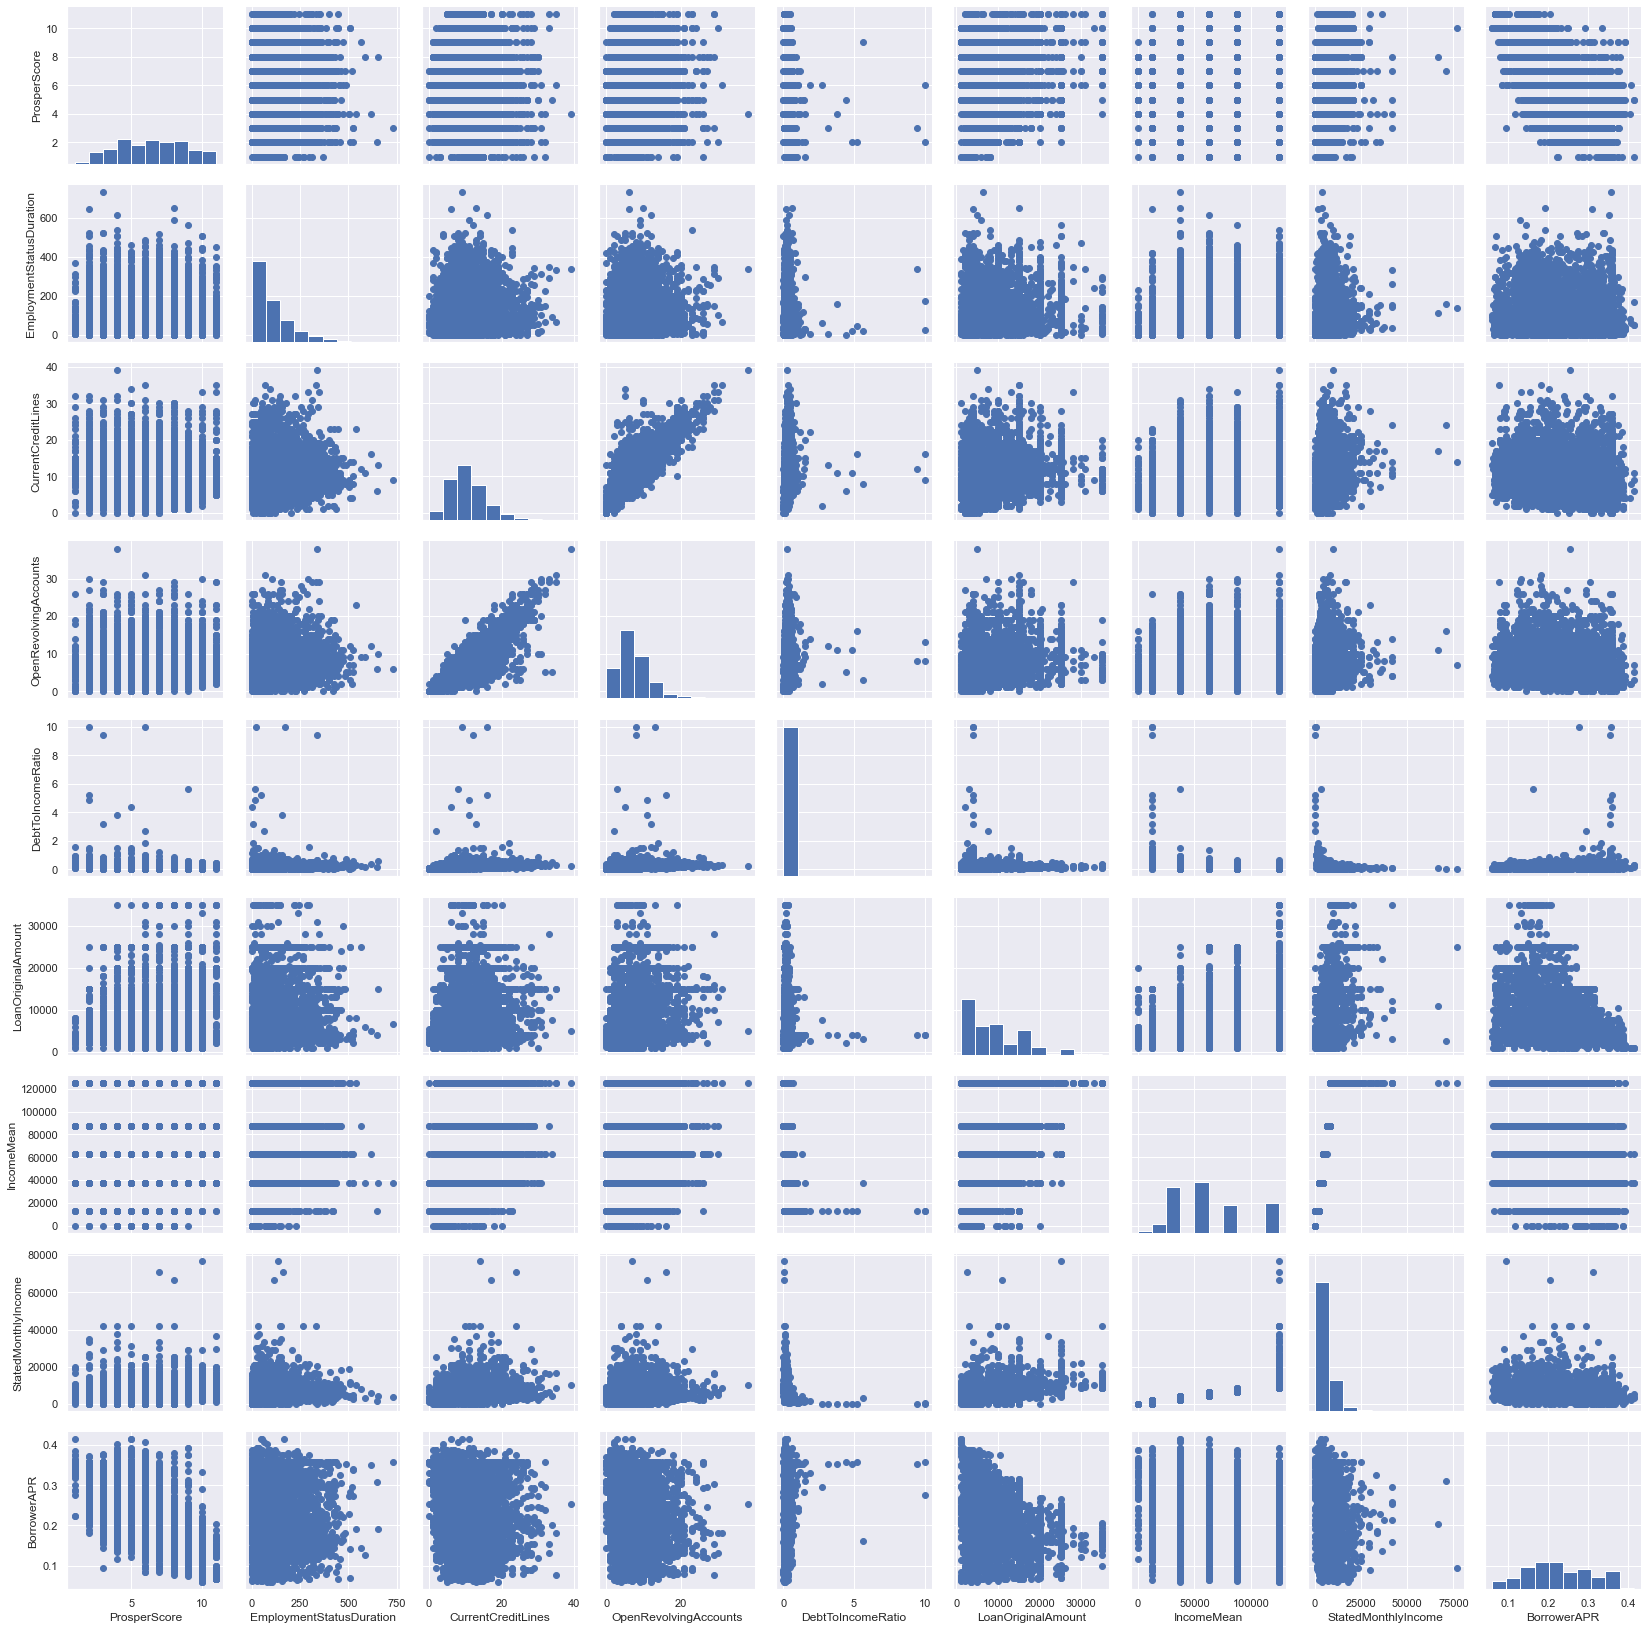

In [373]:
print('We can already analyse the distribution of our numeric features in the diagonal.')
print('And we can see the relationship between a few variables. As visible there are features with strong relationship.')

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_offdiag(plt.scatter);
g.map_diag(plt.hist, bins=10);

### Univariate Exploration

Lets look at the distribution of Loan amount lended by Prosper.
As we can see the vast majority of loans doesnt exceed 15,000$.
In addition, the bell curve can help us see if there is a normal distribution underneath, which is not the case here.


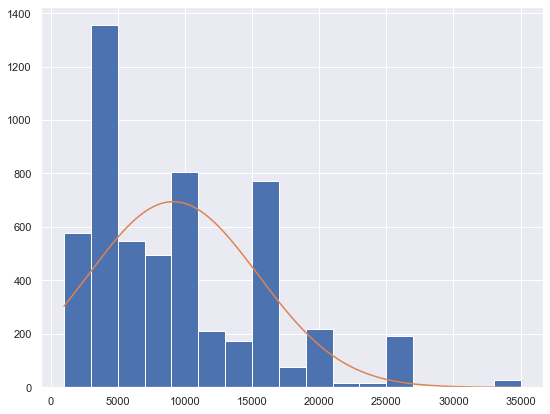

In [374]:
print('Lets look at the distribution of Loan amount lended by Prosper.')
print('As we can see the vast majority of loans doesnt exceed 15,000$.')
print('In addition, the bell curve can help us see if there is a normal distribution underneath, which is not the case here.')
# create a histogram of the data
bin_size = 2000
bin_edges = np.arange(1000, 35000 + bin_size, bin_size)
plt.hist(data = df_samp, x = 'LoanOriginalAmount', bins = bin_edges);

# overlay a theoretical normal distribution on top
samp_mean = df_samp['LoanOriginalAmount'].mean()
samp_sd = df_samp['LoanOriginalAmount'].std()

from scipy.stats import norm
x = np.linspace(1000, 35000, 2000)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= df_samp.shape[0] * bin_size # scale the distribution height

plt.plot(x, y);

Lets look at the distribution using the population dataset to ensure we are not missing anything.
We can see using proportion and a density line that our Loan Amount distribution is clearly peaking around 5,000$,
Similarly, the density line does not look normal:


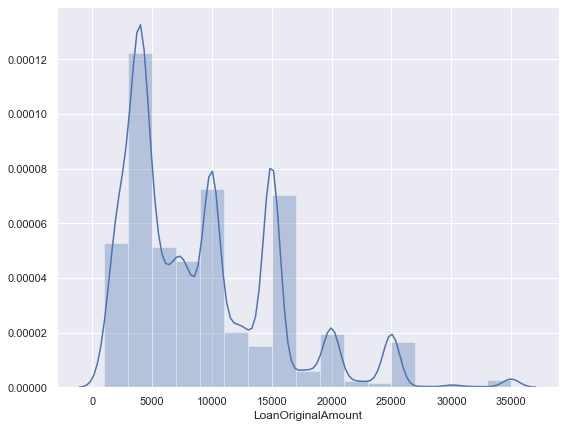

In [375]:
print('Lets look at the distribution using the population dataset to ensure we are not missing anything.')
print('We can see using proportion and a density line that our Loan Amount distribution is clearly peaking around 5,000$,')
print('Similarly, the density line does not look normal:')
sb.distplot(df['LoanOriginalAmount'], hist_kws = {'alpha' : 1/3}, bins = bin_edges)
plt.show();

Lets look at the numbers of borrowers by Employment Status:


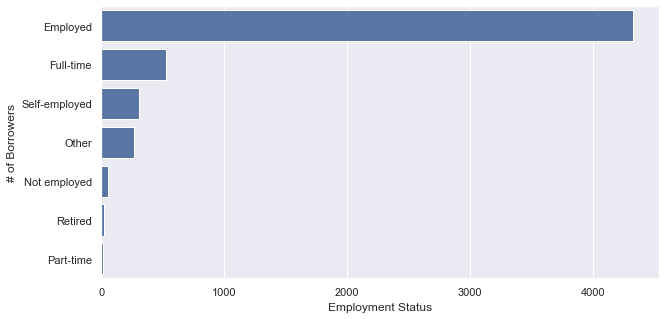

In [376]:
print('Lets look at the numbers of borrowers by Employment Status:')
# Plot for EmploymentStatus
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]
# Order the categorical variable type
cat_order = df_samp['EmploymentStatus'].value_counts().index

sb.countplot(data = df_samp, y = 'EmploymentStatus', color = base_color, order=cat_order)
plt.xlabel('Employment Status')
plt.ylabel('# of Borrowers');

The majority of borrowers are employed, which makes sense. Getting a loan without a job is not known to be easy.

The Debt to Income ratio is a good metric to look at the level of debt borrowers are committing themselves.


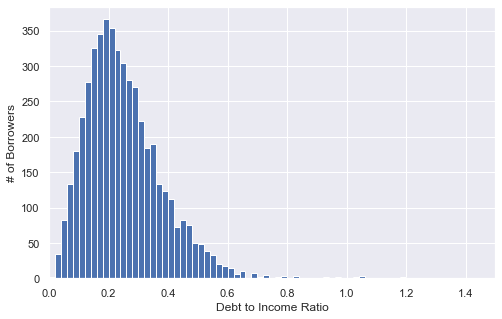

In [377]:
print('The Debt to Income ratio is a good metric to look at the level of debt borrowers are committing themselves.')
# Plot a standard-scaled plot for DebtToIncomeRatio
binsize = 0.02
bins = np.arange(0, df_samp['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_samp[df_samp['DebtToIncomeRatio'].notnull()], x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('# of Borrowers')
plt.xlim(0,1.5);

The distribution looks pretty normal, slightly right-skewed.

How many of these 5,500 borrowers (sample) have their income verifiable:


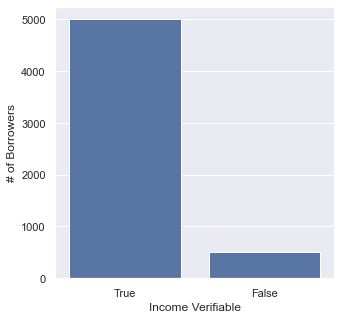

In [378]:
print('How many of these 5,500 borrowers (sample) have their income verifiable:')
# Plot for IncomeVerifiable
plt.figure(figsize=[5, 5])

# Order the categorical variable type
cat_order = df_samp['IncomeVerifiable'].value_counts().index

sb.countplot(data = df_samp, x = 'IncomeVerifiable', color = base_color, order=cat_order)
plt.xlabel('Income Verifiable')
plt.ylabel('# of Borrowers');

It is likely harder to get a loan request approved without your income verified.

### Bivariate Exploration

A correlarion grid a a great way to check the correlarion/relationship of multiple variables:


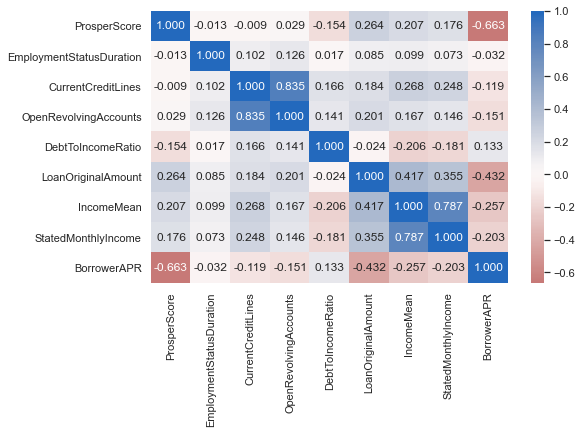

In [379]:
print('A correlarion grid a a great way to check the correlarion/relationship of multiple variables:')
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_samp[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

We can see that the OpenRevolvingAccount and the CurrentCreditLines have a very strong correlation (0.85). Let's explore this a bit more by plotting them on a scatter plot.

Scatter plot of CurrentCreditLines against OpenRevolvingAccounts.
We can see that the regression line is clear about the direction of the relationship:


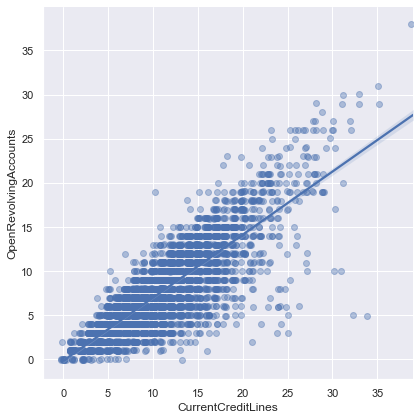

In [380]:
print('Scatter plot of CurrentCreditLines against OpenRevolvingAccounts.')
print('We can see that the regression line is clear about the direction of the relationship:')
#ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
#labels = ['{}'.format(val) for val in ticks]

g = sb.FacetGrid(data = df_samp, height = 6)
g.map(sb.regplot, 'CurrentCreditLines', 'OpenRevolvingAccounts', scatter_kws={'alpha':0.4},y_jitter = 0.04, x_jitter = 0.3, fit_reg= True)
#g.set(xscale = 'log')
#plt.xticks(ticks, labels)
#plt.legend(['False','True']);
plt.show()

In order to get insights on what makes ones get an high loan amount versus a low loan amount. Lets look at the
correlation between IncomeMean/LoanAmount, IncomeMean/ProsperScore and LoanAmount/ProsperScore:


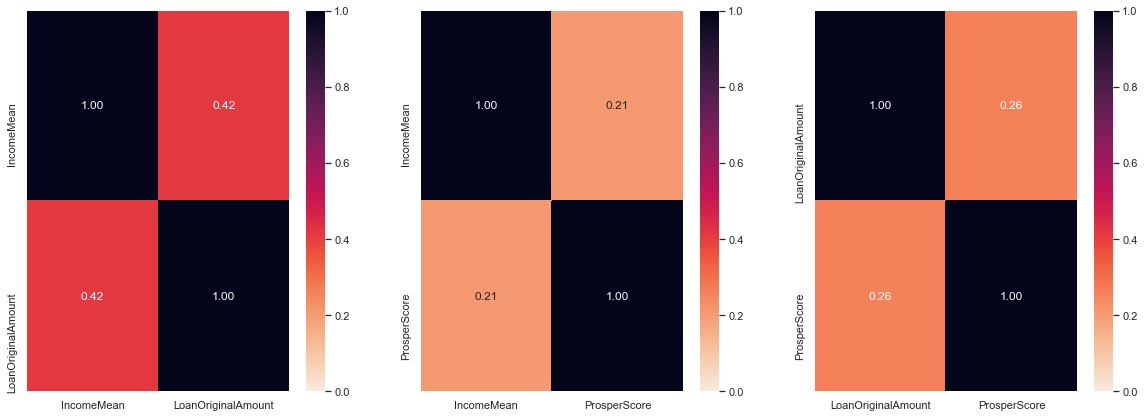

In [381]:
print('In order to get insights on what makes ones get an high loan amount versus a low loan amount. Lets look at the')
print('correlation between IncomeMean/LoanAmount, IncomeMean/ProsperScore and LoanAmount/ProsperScore:')
plt.figure(figsize = [20, 7])

plt.subplot(1,3,1)
stats = ['IncomeMean','LoanOriginalAmount']
sb.heatmap(df_samp[stats].corr(), cmap= 'rocket_r', annot= True, fmt = '.2f', vmin = 0)


plt.subplot(1,3,2)
sb.heatmap(df_samp[['IncomeMean', 'ProsperScore']].corr(), cmap= 'rocket_r', annot= True, fmt = '.2f', vmin = 0)


plt.subplot(1,3,3)
sb.heatmap(df_samp[['LoanOriginalAmount', 'ProsperScore']].corr(), cmap= 'rocket_r', annot= True, fmt = '.2f', vmin = 0);

We can see that they all three have an existing correlation, with IncomeMean/LoanAmount being fairly strong (above 0.4).
Understanding how these three metrics work, we can draw the conclusions that a higher Income drives a better ProsperScore, which drives a higher loan amount. A higher income might also mean that borrower might have a more expensive project to finance, which then drive a higher loan amount.

Let's explore all of this a bit more below.

We can see that the higher the Prosper, the higher the loan amount tends to be.
Similarly, as we saw on the heatmap before, the Prosper score tends to be correlated with a a higher income mean.


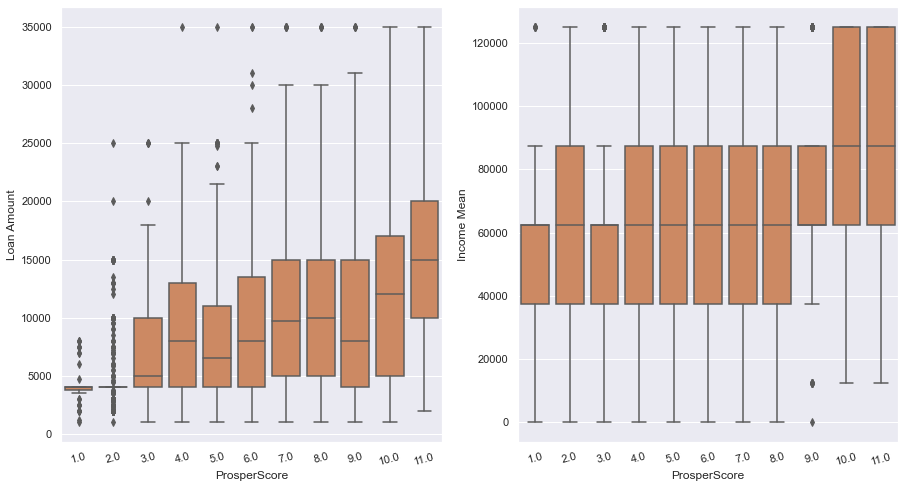

In [382]:
print('We can see that the higher the Prosper, the higher the loan amount tends to be.')
print('Similarly, as we saw on the heatmap before, the Prosper score tends to be correlated with a a higher income mean.')
plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[1]

plt.subplot(1,2,1)
sb.boxplot(data = df_samp, x = 'ProsperScore', y = 'LoanOriginalAmount' ,color = base_color)
plt.xticks(rotation = 15)
plt.ylabel('Loan Amount')


plt.subplot(1,2,2)
sb.boxplot(data = df_samp, x = 'ProsperScore', y = 'IncomeMean' ,color = base_color)
plt.xticks(rotation = 15)
plt.ylabel('Income Mean')
plt.show()

In [383]:
print('To not lose ourselves int the rabbit hole of ProsperGroup, we are going to cut them into groups.')
print('The 4 groups will be: Bad, Average, Good & Very Good.')
bin_edges= [0, 3, 5, 8, 11]
bin_edges

bin_names = ['Bad', 'Average', 'Good', 'Very Good']
bin_names

df_samp['ProsperGroup']=pd.cut(df_samp['ProsperScore'], bin_edges, labels=bin_names)
df['ProsperGroup']=pd.cut(df['ProsperScore'], bin_edges, labels=bin_names)

To not lose ourselves int the rabbit hole of ProsperGroup, we are going to cut them into groups.
The 4 groups will be: Bad, Average, Good & Very Good.


In [384]:
df_samp.head(3)

,ProsperScore,ListingCategory (numeric),ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,IncomeRange,LoanOriginalAmount,LoanStatus,IncomeMean,ProsperRating (Alpha),StatedMonthlyIncome,Term,BorrowerAPR,ListingCreationDate,ProsperGroup
69135,10.0,2,Home Improvement,Employed,52.0,False,3.0,2,0.14,True,75000-99999,20000,Chargedoff,87499,AA,7000.000000,36,0.06828,2012-01-25 10:32:08,Very Good
9730,5.0,1,Debt Consolidation,Employed,182.0,True,9.0,5,0.41,True,25000-49999,10000,Current,37499,D,3750.000000,60,0.23318,2013-11-05 14:06:15,Average
58447,6.0,1,Debt Consolidation,Employed,17.0,True,13.0,10,0.23,True,50000-74999,20000,Current,62499,A,5916.666667,36,0.15833,2013-08-08 17:56:30,Good


The prosper score is undeniably helping to get a higher loan amount:


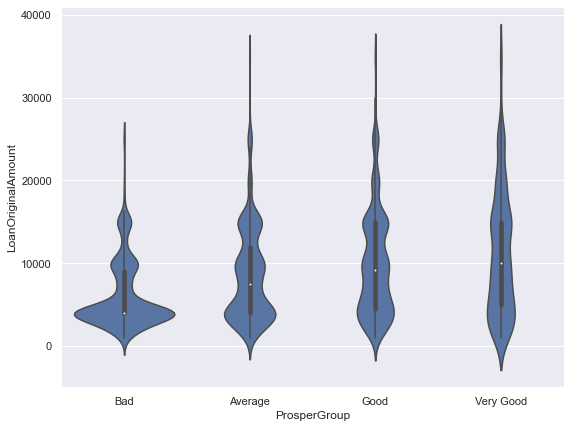

In [385]:
print('The prosper score is undeniably helping to get a higher loan amount:')
base_color = sb.color_palette()[0]
bins = np.arange(0, 35000, 1500)
sb.violinplot(data = df_samp, x = 'ProsperGroup' , y = 'LoanOriginalAmount', bins=bins, color = base_color)
plt.show()

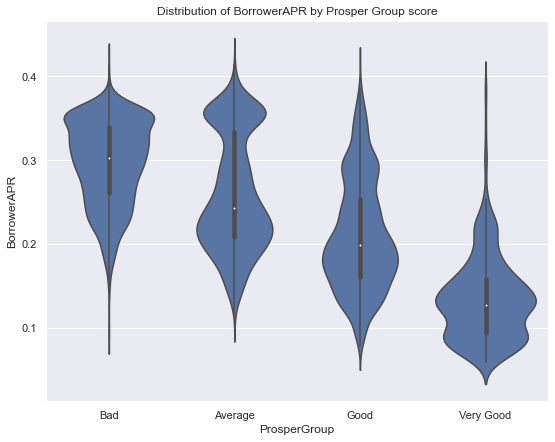

In [386]:
base_color = sb.color_palette()[0]
bins = np.arange(0, 35000, 1500)
sb.violinplot(data = df_samp, x = 'ProsperGroup' , y = 'BorrowerAPR', bins=bins, color = base_color)
plt.title('Distribution of BorrowerAPR by Prosper Group score')
plt.show()

What s the Employment Status that helps us get a better loan ? What about the Income Amount?


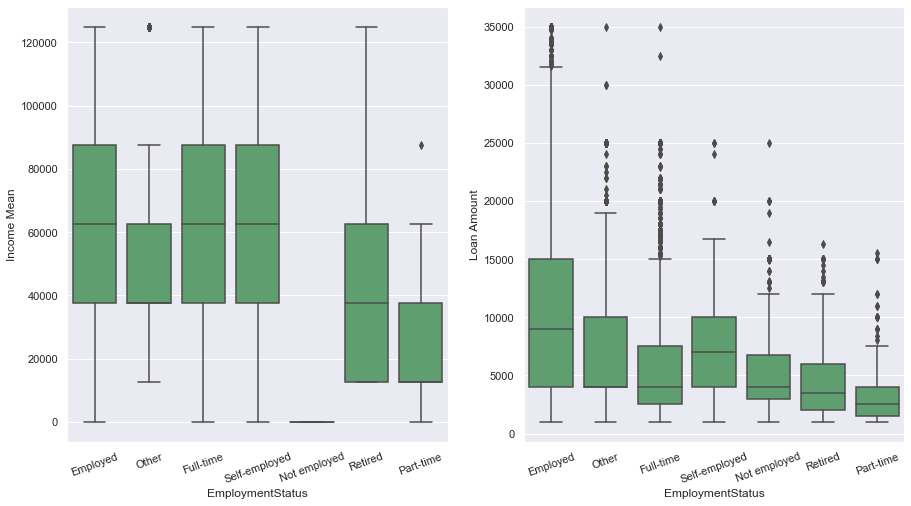

In [387]:
print('What s the Employment Status that helps us get a better loan ? What about the Income Amount?')
plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[2]

plt.subplot(1,2,1)
sb.boxplot(data = df, x = 'EmploymentStatus', y = 'IncomeMean' ,color = base_color)
plt.xticks(rotation = 20)
plt.ylabel('Income Mean')

plt.subplot(1,2,2)
sb.boxplot(data = df, x = 'EmploymentStatus', y = 'LoanOriginalAmount' ,color = base_color)
plt.xticks(rotation = 20)
plt.ylabel('Loan Amount');

Which Categories account for the more important number of loans lended?
 Is there any difference between Home owner or not?


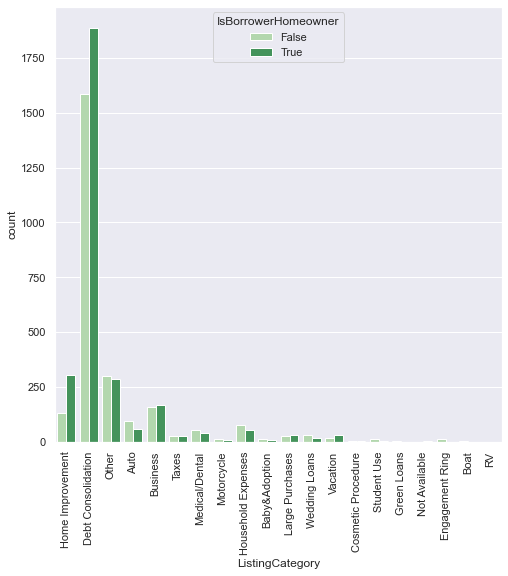

In [388]:
print('Which Categories account for the more important number of loans lended?')
print(' Is there any difference between Home owner or not?')
# LoanType vs IsBorrowerHomeOwner
plt.figure(figsize = [8, 8])

sb.countplot(data = df_samp, x = 'ListingCategory', hue = 'IsBorrowerHomeowner', palette = 'Greens')
plt.xticks(rotation=90);

Let's now look at the Category for which the loan amount is the highest. Let's look at the 5 Categories for which we have the biggest loan medians.

In [389]:
l1 = df_samp.groupby(['ListingCategory']).agg(loan_amount_median=('LoanOriginalAmount', 'median'))
l2 = df_samp.groupby(['ListingCategory']).agg(loan_amount_mean=('LoanOriginalAmount', 'mean'))

In [390]:
listing_df = l1.join(l2)
listing_df = listing_df.sort_values(['loan_amount_median'], ascending= False).head()
listing_df.reset_index(inplace= True)
listing_df['ListingCategory'] = listing_df['ListingCategory'].astype(str)
listing_df.head()

,ListingCategory,loan_amount_median,loan_amount_mean
0,Baby&Adoption,10000,9523.809524
1,Debt Consolidation,10000,10267.554245
2,Wedding Loans,8000,7804.000000
3,Home Improvement,7500,8833.313501
4,Business,7500,8982.697531


We can see the 5 more important loan amount (by the median) by Category:


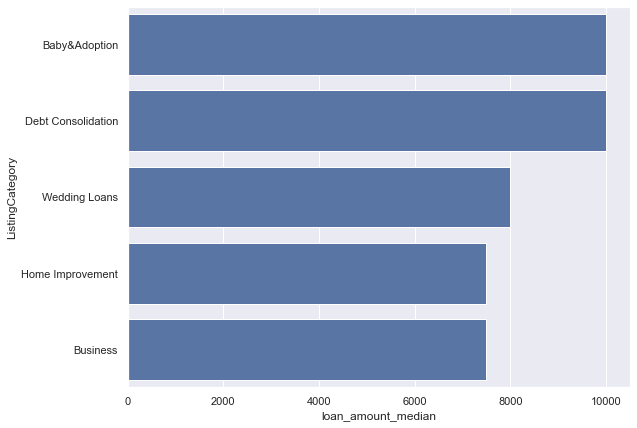

In [391]:
# plotting
print('We can see the 5 more important loan amount (by the median) by Category:')
base_color = sb.color_palette()[0]
sb.barplot(data = listing_df, x = 'loan_amount_median', y = 'ListingCategory',
               color = base_color, ci = 'sd');

With the preliminary look at bivariate relationships out of the way,
I want to see how borrower APR and loan original amount are related to one another for all of the data.


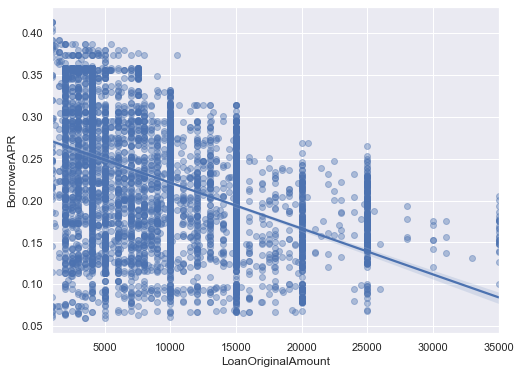

In [392]:
print('With the preliminary look at bivariate relationships out of the way,') 
print('I want to see how borrower APR and loan original amount are related to one another for all of the data.')
plt.figure(figsize = [8, 6])
sb.regplot(data = df_samp, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.4});

This plot shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR is negatively correlated with loan amount.

### Multivariate Exploration

Lets look at the relationship between Loan Amount and Income Mean, with a third variable:
Which is, is the Borrower Home Owner or not?


<Figure size 792x648 with 0 Axes>

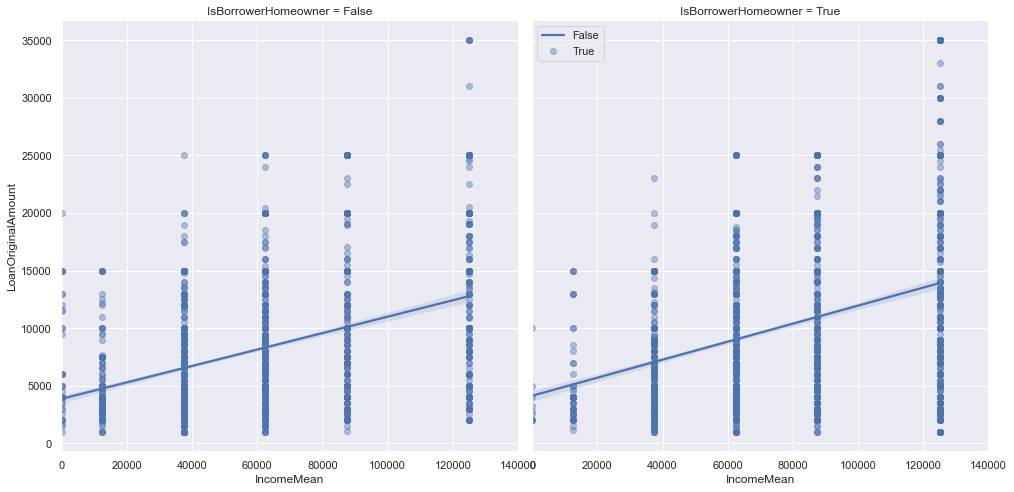

In [393]:
print('Lets look at the relationship between Loan Amount and Income Mean, with a third variable:')
print('Which is, is the Borrower Home Owner or not?')
plt.figure(figsize = [11, 9])

g = sb.FacetGrid(data = df_samp, col = 'IsBorrowerHomeowner', height = 7)
g.map(sb.regplot, 'IncomeMean', 'LoanOriginalAmount', y_jitter = 0.8, x_jitter = 0.6,scatter_kws={'alpha':0.4}, fit_reg= True)

plt.legend(['False','True'])
plt.xlim(-100,140000)
plt.show()

We can clearly see that a relationship is existing, and even if it isn't visually easy to see it, the slope of the regression line is bigger for home owner. Which means that being home owner is a buffer for Prosper when it comes to lend money (since an house is an asset.)

Since the Income Mean has been created after manipulating the IncomeRange, we don't have the necessary granularity for getting the full benefit of a scatter plot. Instead, let's go back to the IncomeRange and see if the data speaks for itself with a box plot.

It is clearly visible that being a home owner is a help to get a higher loan amount. Despite the income range being
similar:


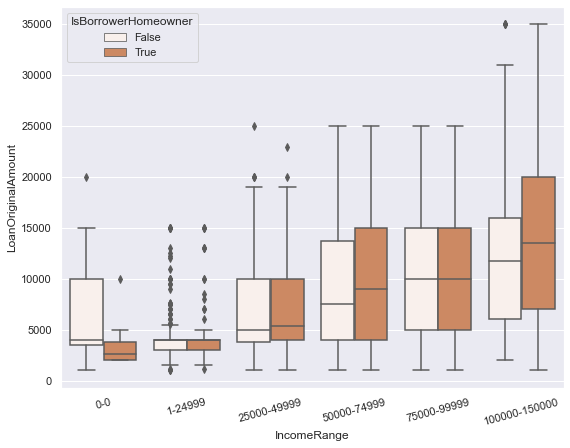

In [394]:
print('It is clearly visible that being a home owner is a help to get a higher loan amount. Despite the income range being')
print('similar:')
income_classes = ['0-0','1-24999' ,'25000-49999', '50000-74999', '75000-99999', '100000-150000']
incomeclasses = pd.api.types.CategoricalDtype(ordered = True, categories= income_classes)
df_samp['IncomeRange'] = df_samp['IncomeRange'].astype(incomeclasses)

base_color = sb.color_palette()[1]
sb.boxplot(data = df_samp, x = 'IncomeRange', y = 'LoanOriginalAmount',hue = 'IsBorrowerHomeowner' ,color = base_color)
plt.xticks(rotation = 15);

Lets now look at how the Debt to Income ratio distribution is changing based on the ProsperGroup Score.
we can see that for Good and Very Good group. The Debt to Income ratio does not peak after 0.2.


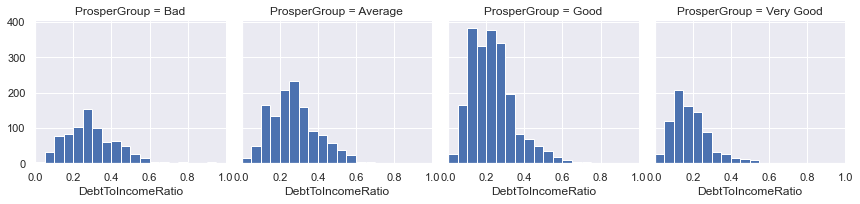

In [395]:
print('Lets now look at how the Debt to Income ratio distribution is changing based on the ProsperGroup Score.')
print('we can see that for Good and Very Good group. The Debt to Income ratio does not peak after 0.2.')
bins = np.arange(0, 1, 0.05)
g = sb.FacetGrid(data = df_samp, col = 'ProsperGroup', margin_titles = True)
g.map(plt.hist,'DebtToIncomeRatio', bins=bins)
plt.xlim(0,1)
plt.show()

To sum up our findings, we can say that being employed and having your income verifiable seem to be a great way to get your loan approved. In addition, the higher your income is, the better your Prosper score can be and the higher your loan can be too. Prosper seems to have good reasons to believe that their way to assess someone's request is fair and relevant since we have seen that the lower your Prosper Score is, the higher your Debt To Income ratio is....which means more risk.

To have valuable asset such as an house is a great help too.

The Prosper team seems to be doing a great job at assessing borrower profile and accepting to lend them money.

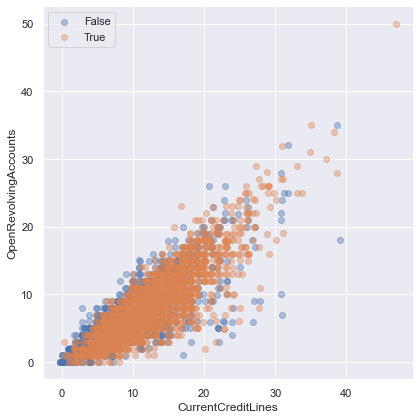

In [49]:
#ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
#labels = ['{}'.format(val) for val in ticks]

#g = sb.FacetGrid(data = df_samp, hue='IsBorrowerHomeowner' ,height = 6)
#g.map(sb.regplot, 'CurrentCreditLines', 'OpenRevolvingAccounts', scatter_kws={'alpha':0.4},y_jitter = 0.04, x_jitter = 0.3, fit_reg= False)
#g.set(xscale = 'log')
#plt.xticks(ticks, labels)
#plt.legend(['False','True']);
#plt.show()

In [50]:
#plt.heatmap2d(data = df_samp, x = 'IncomeMean', y = 'LoanOriginalAmount', color = 'inferno_r')
#g.set(xscale = 'log')
#plt.xticks(ticks, labels)

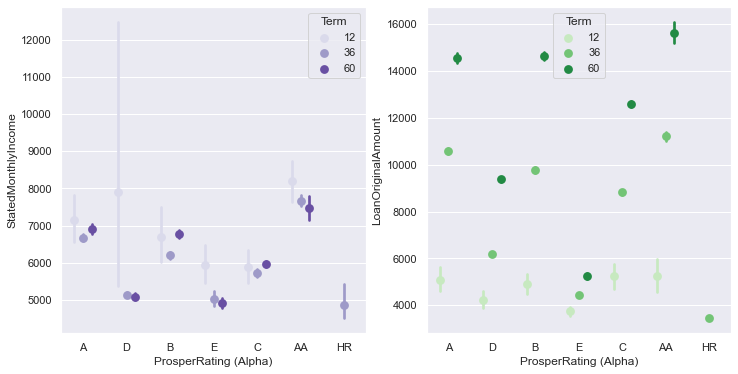

In [419]:
#fig, ax = plt.subplots(ncols=2, figsize=[12,6])
#sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
#           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
#sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
#           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

In [284]:
#IncomeRange = []

def f(row):
    if row['IncomeRange'] == '$100,000+':
         return '100000'
    elif row['IncomeRange'] == '$0':
        return '0'
    elif row['IncomeRange'] == 'Not employed':
        return '0'
    elif row['IncomeRange'] == 'Not displayed':
        return '0'
    else:
        row.IncomeRange
        
df['IncomeRange'] = df.apply(f, axis=1)

In [285]:
df.sample(25)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
38621,47CE351859748369161EF19,512832,2011-06-23 13:05:34.983000000,NaN,60,Current,NaN,0.20436,0.1899,0.1799,...,-213.34,0.00,0.00,0.00,0.00,1.0,0,0,0.0,207
58755,23A43400245828719F9E49E,209283,2007-10-01 10:31:16.357000000,D,36,Completed,2010-10-12 00:00:00,0.14265,0.1300,0.1200,...,-22.81,-48.12,0.00,0.00,0.00,1.0,0,0,0.0,71
13652,102636010756815512B87F4,1185356,2014-02-10 06:43:54.543000000,NaN,60,FinalPaymentInProgress,NaN,0.16686,0.1435,0.1335,...,0.00,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1
92884,25A435984199177189BD1DA,1060369,2013-12-19 21:41:09.370000000,NaN,36,Current,NaN,0.23438,0.1970,0.1870,...,-16.81,0.00,0.00,0.00,0.00,1.0,0,0,0.0,4
80829,478B337659237561508B936,79502,2006-12-30 06:57:03.873000000,B,36,Chargedoff,2009-11-13 00:00:00,0.17722,0.1700,0.1650,...,-199.52,0.00,5955.43,5955.43,0.00,1.0,0,0,0.0,84
7338,0A3E3425086667737091685,364160,2008-07-08 20:32:56.567000000,HR,36,Completed,2009-12-11 00:00:00,0.20210,0.1800,0.1700,...,-11.66,0.00,0.00,0.00,0.00,1.0,1,1,100.0,33
79611,DED335874909529647B2B15,868701,2013-08-13 14:53:40.667000000,NaN,36,Current,NaN,0.19645,0.1599,0.1499,...,-47.61,0.00,0.00,0.00,0.00,1.0,0,0,0.0,63
40459,4E103551078539859425A9C,603297,2012-06-24 11:59:42.490000000,NaN,60,Chargedoff,2013-07-03 00:00:00,0.28704,0.2610,0.2510,...,-24.68,-17.00,4744.32,4744.32,0.00,1.0,0,0,0.0,39
86465,7F6A3429535302371E1F6A2,382189,2008-08-13 12:54:12.447000000,D,36,Chargedoff,2012-01-04 00:00:00,0.32378,0.3000,0.2900,...,-22.11,-194.21,164.56,5.87,171.39,1.0,0,0,0.0,41
102366,B0593410324486594127C31,267968,2008-01-18 23:24:11.103000000,D,36,Completed,2008-08-25 00:00:00,0.35961,0.3475,0.3375,...,-26.96,0.00,0.00,0.00,0.00,1.0,0,0,0.0,39


In [111]:
#listing_df['ListingCategory (numeric)'].replace(['11', '17', '20', '1', '8'], ['Engagement Ring', 'RV', 'Wedding loan', 'Debt Consolidation', 'Baby/Adoption'], inplace=True)
#listing_df

In [104]:
# create faceted heat maps on levels of the clarity variable
#g = sb.FacetGrid(data = df_samp, col = 'IsBorrowerHomeowner', col_wrap = 2, height = 3)
#g.map(hist2dgrid, 'CurrentCreditLines', 'OpenRevolvingAccounts', color = 'inferno_r')
#g.set_xlabels('Carat')
#g.set_ylabels('Price ($)')

#plt.show()